### Visualising data 

We are working on helping NGO project Lecturers without borders [2] to visualise and to estimate their impact.
One possibility is to visualise airtable data we have online in the form 


<img src="slack_airtable.png" alt="Drawing" style="width: 200px;"/>

which we would like to convert to the map form 

<img src="map.png" alt="Drawing" style="width: 200px;"/>

### Reading datafiles 

We take as an example several data files:
1. LeWiBo data of lectures made from airtable (open data from google for schools)
2. LeWiBo geolocation data from www.scied.network airtable on a map
3. Registered participants to LeWiBo (depersonalised data)


In [26]:
from dbfread import DBF
import geopandas as gpd
import pandas as pd
import csv
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap



############Functions to plot###############
def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))


###########OPEN data FILE###################

print('reading lectures from LeWiBo, update from August 2019')        
My_file_path_name = 'C:/Users/lyubo/Documents/DATA_networks/lecturers_without_borders/Lectures-Grid_august2019.csv'

print('turning csv file to pandas')
df_lectures=  pd.read_csv(My_file_path_name, header=None, dtype=str)
df_lectures.head()


#reading countries 
with open(My_file_path_name) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=';')
    line_count = 0
    for row in csv_reader:
        line_count += 1        # count in which country the lecture was made
    print(f'Processed {line_count} lines.')


# reading columns of file 
#df_lectures.columns = ["Date of lecture", "Place of lecture", "Address of school", "Topic of the lecture", "People giving lecture", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]


#access Place of lecture column 
df_lectures[[1]]
countries = df_lectures.iloc[:,1].values
print(countries)






reading lectures from LeWiBo, update from August 2019
turning csv file to pandas
Processed 74 lines.
['Place of lecture' 'Nepal' 'Nepal' 'Nepal' 'Nepal' 'Russia' 'Russia'
 'Germany' 'Germany' 'France' 'Georgia' 'Russia' 'Russia' 'Germany'
 'Indonesia' 'Indonesia' 'Indonesia' 'Indonesia' 'Russia' 'Senegal' 'India'
 'India' 'India' 'India' 'India' 'India' 'Georgia' 'Portugal' 'Russia'
 'Russia' 'France' 'Russia' 'India' 'India' 'Russia' 'France' 'Congo'
 'Russia' 'Piligrim' 'Columbia' 'Germany' 'Uganda' 'France' 'Greece'
 'France' 'France' 'Russia' 'India' 'India' 'India' 'Russia' 'Russia'
 'Georgia' 'Online' 'Russia' 'France' 'Russia' 'Germany' 'India' 'Russia'
 'India' 'Senegal' 'Senegal' 'Senegal' 'Senegal' 'Senegal' 'France'
 'Russia' 'Russia' 'Russia' 'Russia' 'Russia' 'Italy' 'Nepal']


<class '_io.TextIOWrapper'>


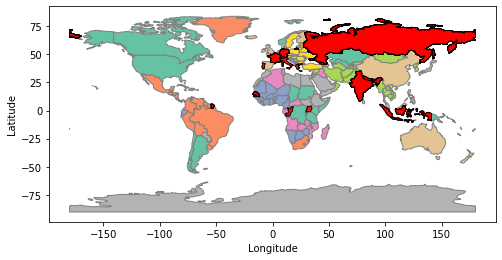

In [38]:
#############Plot lectures made or agreed on map#######################
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

countries_list = open("C:/Users/lyubo/Documents/DATA_networks/countries.txt")
print(type(countries_list))

with open('C:/Users/lyubo/Documents/DATA_networks/countries.txt', 'r') as f2:
    datacountries = f2.read()
    #print(data)
    
for index in range(1, np.size(countries)): #df_scientists.iterrows(): 
    #print(countries[index])# (row["source_iso3"], row["estimated_trips"])
    #check if country is in a list countries.txt
    if countries[index] in datacountries:
        plotCountryPatch(ax2, countries[index], 'red')
    #print(index)
    

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()


### Data analysis 
We can use some basic mapping visualisation of the data from Lecturers without borders. We start with typeform registered participants to LeWiBo (depersonalised data).

### Plotting on a map

Now using suggestions for plotting on a map we plot number of people for each country on a map using some hints from
http://ramiro.org/notebook/basemap-choropleth/

As they suggest to map data values to colors we can take advantage of Matplotlib's colormap API: a color scheme of 9 different saturations of green from light to dark, map the values from CSV file to the 9 color bins, and add a bin column to the DataFrame that can later be used to set the color value.


reading scientists database from LeWiBo depersonalised forms
opening csv file to pandas
<class 'numpy.ndarray'>
Countries
Germany , India
Italy, UK, France, Austria
France, Germany, Western Europe generally
Germany, France, UK
USA, Italy, France, UK, Germany
France, Russia, Germany
Spain, Brazil, currently living in Austria
Indonesia, Bali
Brazil, Finland, Spain, Belgium, India, etc
India, Dubai, Europe
Italy 
Germany
USA,UK,Australia,China, Nepal, France, Canada
nan
nan
Japan, France, various European countries, the US
Germany, Kazakhstan, Turkey. 
UK, France, USA, Austria, Germany
US, EU countries, Turkey, Iran
India, countries in western europe
I travel to various places for conferences, mostly Europe, and I like traveling in general so various options are available. Current plans inclure Lebanon (end April-beg May), Montenegro (June), Malta (end June), Warsaw (mid July), Amsterdam (mid/end July).
Serbia, Austria
US, Russia, France
Italy, Germany, France
Italy, Switzerland, the USA


TypeError: 'in <string>' requires string as left operand, not float

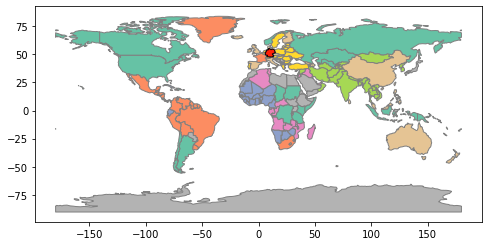

In [39]:
from dbfread import DBF
import geopandas as gpd
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np



############Functions to plot###############
def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

###########OPEN data FILE###################

#opening and printing data from dbf file 
print('reading scientists database from LeWiBo depersonalised forms')        


My_file_path_name = 'C:/Users/lyubo/Documents/DATA_networks/lecturers_without_borders/lecturers_base_depersonalised_july2019.csv'
print('opening csv file to pandas')
df_scientists=  pd.read_csv(My_file_path_name, header=None, dtype=str)
df_scientists.head()
df_scientists.columns

countries = df_scientists.iloc[:,5].values
print(type(countries))

for index in range(0, np.size(countries)): #df_scientists.iterrows(): 
    print(countries[index])# (row["source_iso3"], row["estimated_trips"])
#    print(type(countries[index]))

# reading columns of file 
#df_scientists.columns = ["Date of lecture", "Place of lecture", "Address of school", "Topic of the lecture", "People giving lecture", "ReceivingCountry", "MobilityType", "SpecialNeeds", "SubjectAreaCode", "SubjectAreaName", "CombinedMobilityYesNo", "StartDate", "EndDate", "DurationInMonths", "DurationInDays","SubsistenseTravel", "LevelOfStudy","ParticipantID","ParticipantGender","ParticipantType","Language", "SendingPartnerErasmusID","SendingPArtnerName", "HostingPartnerErasmusID", "HostingPartnerName","HostingPartnerCountry","HostingPartnerCity"]
#df_scientists = df_scientists.rename(columns={'5': 'Countries'})


#############Plot on map#######################
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

with open('C:/Users/lyubo/Documents/DATA_networks/countries.txt', 'r') as f2:
    datacountries = f2.read()
    #print(data)

for index in range(1, np.size(countries)): #df_scientists.iterrows(): 
    print(countries[index])# (row["source_iso3"], row["estimated_trips"])
    if countries[index] in datacountries:
        plotCountryPatch(ax2, countries[index], 'red')
    

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

#TODO:remove some problems with NAN 


### Preparing data

First we prepare data to be in a special format with no multiple entries in each cell for countries.

As they suggest to map data values to colors we can take advantage of Matplotlib's colormap API: a color scheme of 9 different saturations of green from light to dark, map the values from CSV file to the 9 color bins, and add a bin column to the DataFrame that can later be used to set the color value.



  

In [73]:
#set names of columns as we want them
df_scientists.columns = ['Index', 'Name','Position','Participate','Language','Country','Email', 'News','Outreach','Known','Agree','Time', 'Time2','Code']

country_list = df_scientists.Country.values.tolist()
print('first dataset')
print(country_list)

# clean country list from nans, this modifies current dataframe df_scientists !!!
new_df = df_scientists.dropna(how='any', inplace=True)#(subset=['Country'])
#new_df.columns = ['Index', 'Name','Position','Participate','Language','Country','Email', 'News','Outreach','Known','Agree','Time', 'Time2','Code']

df_scientists.head()

# put all countries to one list
#country_list = new_df.Country.values.tolist()
print('second dataset')
print(country_list)


# We start with creating a new dataframe with no duplicates for Country row from the series with Name as the index
new_df = pd.DataFrame(df_scientists.Country.str.split(',').tolist()).stack()
print(new_df)

# turn to array all countries 
country_lewibo = new_df[[1]].values
print((type(country_lewibo)))


first dataset
['Countries', 'Germany , India', 'France, Germany, Western Europe generally', 'France, Russia, Germany', 'Indonesia, Bali', 'Brazil, Finland, Spain, Belgium, India, etc', 'Japan, France, various European countries, the US', 'Italy, Switzerland, the USA', 'India', 'UK, Russia, Estonia, France']
second dataset
['Countries', 'Germany , India', 'France, Germany, Western Europe generally', 'France, Russia, Germany', 'Indonesia, Bali', 'Brazil, Finland, Spain, Belgium, India, etc', 'Japan, France, various European countries, the US', 'Italy, Switzerland, the USA', 'India', 'UK, Russia, Estonia, France']
0  0                      Countries
1  0                       Germany 
   1                          India
2  0                         France
   1                        Germany
   2       Western Europe generally
3  0                         France
   1                         Russia
   2                        Germany
4  0                      Indonesia
   1                 

In [87]:
import numpy as np

# leave only those countries which are on the list

#array_country = np.loadtxt("C:/Users/lyubo/Documents/DATA_networks/countries.txt")

array_country = open("C:/Users/lyubo/Documents/DATA_networks/countries.txt")
contents =array_country.read()
print(type(contents)) #195 countries 

# Test whether each element of a 1-D array is also present in a second array array_country
#contained = [a in array_country for a in country_lewibo]
#np.in1d(country_lewibo, array_country, assume_unique=False, invert=False)



<class 'str'>


In [32]:
# we prepare the data to be plotted on a map 
# we use the following function for this

import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))




def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))


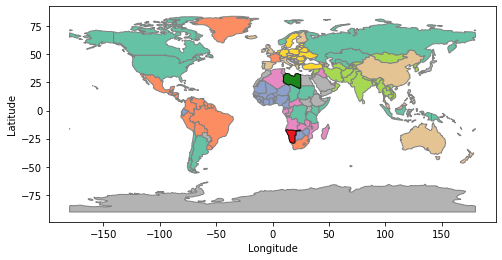

In [17]:

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Africa'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

# then plot some countries on top
plotCountryPatch(ax2, 'Namibia', 'red')
plotCountryPatch(ax2, 'Libya', 'green')

# the place to plot additional vector data (points, lines)

plt.ylabel('Latitude')
plt.xlabel('Longitude')

#ax2.axis('scaled')
plt.show()

In [ ]:
# for creation of data bins

values = df[year]
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
df['bin'] = np.digitize(values, bins) - 1
df.sort_values('bin', ascending=False).head(10)

In [ ]:
#rename columns of dataframe
#let us read the countries of dataframe 

column_country = "What are the most popular countries you visit?"
df_scientists.column_country.iloc[0]


# analysis of the particular entrence 
df_scientists.iloc[4]


In [40]:
# Now let us plot more deatailed data on a map
# First we define x as countries using latitude and longitude pairs for airports. The first map we can make is one that shows all the airports all over the world. We can do this with the basemap extension to matplotlib. This enables drawing world maps and adding points, and is very customizable.
# Import the basemap package
from mpl_toolkits.basemap import Basemap

# Create a map on which to draw. 
# Use mercator projection, and showing the whole world.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw coastlines, and the edges of the map.


m.drawcoastlines()
m.drawmapboundary()
# Convert latitude and longitude to x and y coordinates
x, y = m(list(airports["longitude"].astype(float)), list(airports["latitude"].astype(float)))

# Use matplotlib to draw the points onto the map.
m.scatter(x,y,1,marker='o',color='red')
# Show the plot.


plt.show()


Work in progress